In [21]:
dt = 0.001 #milisekundy, 1/1000 sekundy
p=1

1

In [4]:
using Plots

In [5]:
# dane
g = 9.81
m = 65
vx₀ = 26.5
α = π / 9
vy₀=26.5
v₀=26.5
# obliczenia


h=80
hₘ = h+((v₀ * sin(α)) ^ 2) / (2 * g)
czas = (2 * v₀ * sin(α)) / g

k=0.5
czas = (2 * v₀ * sin(α)) / g

1.8478152493639592

In [6]:
delta2=v₀^2*sin(α)*sin(α)+2*g*h
t1=(-v₀*sin(α)-sqrt(delta2))/(-g)


5.066792268075566

# z nośną wszystko

In [23]:
function vx_num(v₀, α, k, m,p, dt)
    vx = zeros(floor(Int, (czas+t1) / dt), 1)
    vx[1] = v₀ * cos(α)
    for i in (2 : floor(Int, (czas+t1) / dt))
        vx[i] = vx[i-1] - (k / m) * vx[i-1] * dt + (p / m) * vx[i-1] * dt
    end
    return vx
end

function vy_num(v₀, α, k, m, g, p, dt)
    vy = zeros(floor(Int, (czas+t1)/ dt), 1)
    vy[1] = v₀ * sin(α)
    for i in (2 : floor(Int, (czas+t1)  / dt))
        vy[i] = vy[i-1] - (g * dt) - (k / m) * vy[i-1] * dt  + (p / m) * vy[i-1] * dt 
    end
    return vy
end


function x_num(v₀, α, k, m,p, dt)
    vx = zeros(floor(Int, (czas+t1) / dt), 1)
    vx[1] = v₀ * cos(α)
    x = zeros(floor(Int, (czas+t1) / dt), 1)
    x[1] = 0
    for i in (2 : floor(Int, (czas+t1) / dt))
        vx[i] = vx[i-1] - (k / m) * vx[i-1] * dt
        x[i] = x[i-1] + vx[i-1] * dt - (1 / 2) * (k / m) * vx[i-1] * dt ^ 2 + (1 / 2)*(p / m) * vx[i-1] * dt
    
    end
    return x
end

function y_num(v₀, α, k, m, g,h,p, dt)
    vy = zeros(floor(Int, (czas+t1) / dt), 1)
    vy[1] = v₀ * sin(α)
    y = zeros(floor(Int, (czas+t1) / dt), 1)
    y[1] = 80
    for i in (2 : floor(Int, (czas+t1) / dt))
        vy[i] = vy[i-1] - (g * dt) - (k / m) * vy[i-1] * dt+ (1 / 2) * (p / m) * vy[i-1] * dt ^ 2
    
        y[i] = y[i-1] + vy[i-1] * dt - ((1 / 2) * g * dt ^ 2) - (1 / 2) * (k / m) * vy[i-1] * dt ^ 2 + (1 / 2) * (p / m) * vy[i-1] * dt ^ 2
    end
    return y
end


y_num (generic function with 1 method)

In [24]:
h=80
czas_opor = 0
czas_opor_end=0
p=1
for i in (1 : floor(Int, (czas+t1) / dt))
    if abs(y_num(v₀, α, k, m, g, h,p, dt)[i]) < 0.007
        czas_opor = i
       
    end
end
czas_opor

5086

In [25]:
zasieg_opor = x_num(v₀, α, k, m, p, dt)[czas_opor]

125.13663132378053

In [26]:
hₘ_opor = maximum(y_num(v₀, α, k, m, g,h,p, dt))

84.16723655039846

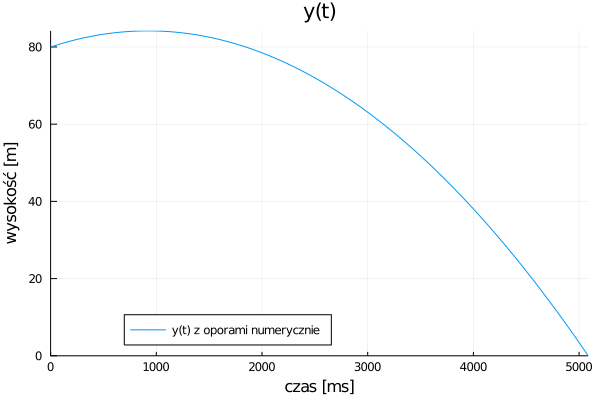

In [27]:
plot(y_num(v₀, α, k, m, g,h,p, dt),
    xlabel = "czas [ms]", 
    ylabel = "wysokość [m]",
    label = "y(t) z oporami numerycznie",
    legend = :bottom,
    xlim = (0, czas_opor),
    ylim = (0, hₘ_opor),
    title = "y(t)")

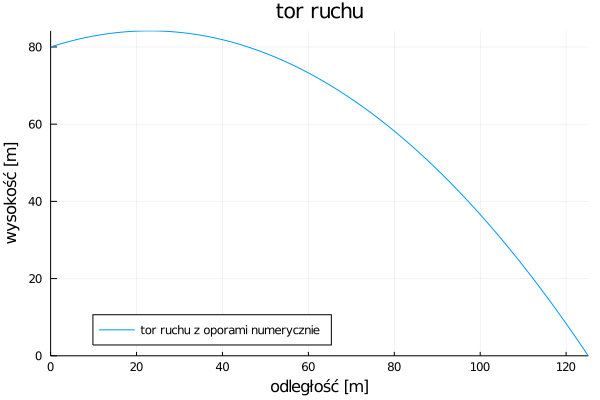

In [28]:
p=1
plot(x_num(v₀, α, k, m,p,dt), y_num(v₀, α, k, m, g,h, p, dt),
    xlabel = "odległość [m]", 
    ylabel = "wysokość [m]",
    label = "tor ruchu z oporami numerycznie",
    xlim = (0, zasieg_opor),
    ylim = (0, hₘ_opor),
    legend = :bottom,
    title = "tor ruchu")
